In [8]:
import importlib
import multiprocessing as mp

import numpy as np
import matplotlib.pyplot as plt

import axion_mass
import g_star
import eom_solver
import density_plot

eom_solver = importlib.reload(eom_solver)
density_plot = importlib.reload(density_plot)

In [5]:
m_a_fn = axion_mass.m_a_from_chi_general
g_model = g_star.borsamyi_table

/home/janik/Documents/bachelor/density_plot.py:14: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(f_a / 1e9, theta_i, np.log10(Omega_a_h_sq))


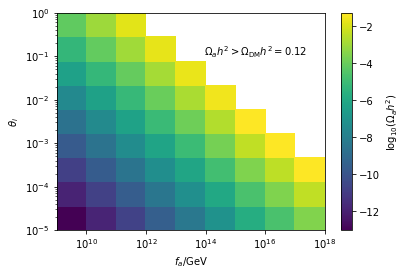

In [7]:
_ = density_plot.plot_density(theta_i_s, f_a_s, Omega_a_h_sq)

In [19]:
%%time
theta_i_s = np.logspace(-5, 0, 10)
f_a_s = np.logspace(9, 18, 10) * 1e9
points = [(i * theta_i_s.size + j + 1, theta_i, f_a) 
          for i, theta_i in enumerate(theta_i_s) for j, f_a in enumerate(f_a_s)]
total = theta_i_s.size * f_a_s.size
num_workers = 4
def worker_fn(p): 
    print(p[0], "out of", total, "...", end="")
    ans = eom_solver.compute_density_parameter(*p[1:], m_a_fn, g_model)
    print(" done")
    return ans
with mp.Pool(num_workers) as poolparty:
    ans = poolparty.map(worker_fn, points)
Omega_a_h_sq = np.array(ans).reshape(theta_i_s.size, f_a_s.size)

/home/janik/Documents/bachelor/axion_mass.py:183: RuntimeWarning: invalid value encountered in double_scalars
  correction_factor = (1 - np.log(model.Lambda_QCD / T))**d
/home/janik/Documents/bachelor/axion_mass.py:69: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(chi(T)) / f_a
/home/janik/Documents/bachelor/axion_mass.py:183: RuntimeWarning: invalid value encountered in double_scalars
  correction_factor = (1 - np.log(model.Lambda_QCD / T))**d
/home/janik/Documents/bachelor/axion_mass.py:69: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(chi(T)) / f_a
/home/janik/Documents/bachelor/axion_mass.py:183: RuntimeWarning: invalid value encountered in double_scalars
  correction_factor = (1 - np.log(model.Lambda_QCD / T))**d
/home/janik/Documents/bachelor/axion_mass.py:69: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(chi(T)) / f_a
/home/janik/Documents/bachelor/axion_mass.py:183: RuntimeWarning: invalid value encountered in doubl

CPU times: user 39.1 ms, sys: 16.3 ms, total: 55.4 ms
Wall time: 44 s


In [18]:
(60 + 48) / 43.2

2.5